## Rubric

Instructions: DELETE this cell before you submit via a `git push` to your repo before deadline. This cell is for your reference only and is not needed in your report. 

Scoring: Out of 10 points

- Each Developing  => -2 pts
- Each Unsatisfactory/Missing => -4 pts
  - until the score is 

If students address the detailed feedback in a future checkpoint they will earn these points back


|                  | Unsatisfactory                                                                                                                                                                                                    | Developing                                                                                                                                                                                              | Proficient                                     | Excellent                                                                                                                              |
|------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|
| Data relevance   | Did not have data relevant to their question. Or the datasets don't work together because there is no way to line them up against each other. If there are multiple datasets, most of them have this trouble | Data was only tangentially relevant to the question or a bad proxy for the question. If there are multiple datasets, some of them may be irrelevant or can't be easily combined.                       | All data sources are relevant to the question. | Multiple data sources for each aspect of the project. It's clear how the data supports the needs of the project.                         |
| Data description | Dataset or its cleaning procedures are not described. If there are multiple datasets, most have this trouble                                                                                              | Data was not fully described. If there are multiple datasets, some of them are not fully described                                                                                                      | Data was fully described                       | The details of the data descriptions and perhaps some very basic EDA also make it clear how the data supports the needs of the project. |
| Data wrangling   | Did not obtain data. They did not clean/tidy the data they obtained.  If there are multiple datasets, most have this trouble                                                                                 | Data was partially cleaned or tidied. Perhaps you struggled to verify that the data was clean because they did not present it well. If there are multiple datasets, some have this trouble | The data is cleaned and tidied.                | The data is spotless and they used tools to visualize the data cleanliness and you were convinced at first glance                      |


# COGS 108 - Data Checkpoint

## Authors

Instructions: REPLACE the contents of this cell with your team list and their contributions. Note that this will change over the course of the checkpoints

This is a modified [CRediT taxonomy of contributions](https://credit.niso.org). For each group member please list how they contributed to this project using these terms:
> Analysis, Background research, Conceptualization, Data curation, Experimental investigation, Methodology, Project administration, Software, Visualization, Writing – original draft, Writing – review & editing

Example team list and credits:
- Alice Anderson: Conceptualization, Data curation, Methodology, Writing - original draft
- Bob Barker:  Analysis, Software, Visualization
- Charlie Chang: Project administration, Software, Writing - review & editing
- Dani Delgado: Analysis, Background research, Visualization, Writing - original draft

## Research Question

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback



## Background and Prior Work

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Hypothesis


Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback


## Data

### Data overview

Instructions: REPLACE the contents of this cell with descriptions of your actual datasets.

For each dataset include the following information
- Dataset #1
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
  - Description of the variables most relevant to this project
  - Descriptions of any shortcomings this dataset has with repsect to the project
- Dataset #2 (if you have more than one!)
  - same as above
- etc

Each dataset deserves either a set of bullet points as above or a few sentences if you prefer that method.

If you plan to use multiple datasets, add a few sentences about how you plan to combine these datasets.

- Dataset #4
  - Dataset Name: **Social Media and Mental Health** (survey; `smmh.csv`)
  - Link to the dataset (official Kaggle page): `https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health`
  - Reproducible raw CSV mirror used in this repo (no Kaggle login required): `https://raw.githubusercontent.com/Daerkns/correlation-between-social-media-and-mental-health/main/smmh.csv`
  - Number of observations: **481** survey responses (rows)
  - Number of variables: **21** columns
  - Description of the variables most relevant to this project:
    - Demographics/controls: age, gender, relationship status, occupation status, affiliated organization type
    - Social media usage: whether they use social media, which platforms (comma-separated list), and average time spent per day (categorical bins)
    - Wellbeing / mental health proxies (mostly Likert 1–5): distractedness, worries, concentration difficulty, social comparison frequency + feelings about comparisons, validation seeking, feeling depressed/down, interest fluctuation, sleep issues
  - Shortcomings / limitations:
    - Cross-sectional and self-reported survey data (no causal conclusions; subject to recall/social desirability bias)
    - Does not include direct “active interaction” counts (posting/commenting/DMs); we will treat it as a **supporting** dataset and use available proxies (time-spent, platforms, comparison/validation items)
    - Potential sample bias (survey respondents are not representative of all adults)
    - Small number of potentially inconsistent responses (e.g., `Do you use social media? = No` but other usage questions answered) that we will flag and handle explicitly in cleaning

In [15]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# Setup code -- this only needs to be run once after cloning the repo!
# This cell downloads raw data into `data/00-raw/`.

# If you're missing packages in your environment, uncomment this line
# %pip install pandas numpy matplotlib seaborn

import os
import urllib.request

# Ensure expected data directories exist.
os.makedirs('data/00-raw', exist_ok=True)
os.makedirs('data/01-interim', exist_ok=True)
os.makedirs('data/02-processed', exist_ok=True)

# Dataset #4 (Social Media and Mental Health)
SMMH_URL = 'https://raw.githubusercontent.com/Daerkns/correlation-between-social-media-and-mental-health/main/smmh.csv'
SMMH_LOCAL = 'data/00-raw/smmh.csv'

def download_if_missing(url: str, local_path: str) -> None:
    if os.path.exists(local_path) and os.path.getsize(local_path) > 0:
        print(f"Already exists: {local_path}")
        return

    print(f"Downloading to: {local_path}")
    urllib.request.urlretrieve(url, local_path)
    print(f"Downloaded: {local_path} ({os.path.getsize(local_path)} bytes)")

download_if_missing(SMMH_URL, SMMH_LOCAL)

Downloaded: data/00-raw/smmh.csv (77195 bytes)


### Dataset #1 

Dataset Name: Instagram Usage Lifestyle Dataset (instagram_usage_lifestyle.csv)

Link to the dataset: https://www.kaggle.com/datasets/sadiajavedd/social-media-user-activity-dataset

Number of observations: 1,547,896 raw rows; 1,401,638 rows after applying the age 18+ filter

Number of variables: 58 raw columns; 14 columns in our processed analysis table for Dataset #1

Description of the variables most relevant to this project:
We use time_on_feed_per_day as our passive-use proxy (minutes/day), posts_created_per_week as our active-use proxy (posts/week), perceived_stress_score as the stress outcome, and self_reported_happiness as the happiness outcome. We retain controls for confounding: age, gender, country, urban_rural, income_level, employment_status, education_level, exercise_hours_per_week, sleep_hours_per_night, and weekly_work_hours

Descriptions of any shortcomings this dataset has with respect to the project:
The dataset is observational and treated as cross-sectional in our checkpoint, so we cannot make causal claims. Our initial active/passive operationalization uses one variable for each style, which may not fully capture the full behavior spectrum; we may expand to composite measures in later analysis. The data are also unusually clean (near-zero missingness across many fields), which may indicate synthetic or heavily processed construction and can limit external validity. Finally, despite using controls, unmeasured confounding can still bias estimated associations.

Dataset #1 Narrative

This dataset (instagram_usage_lifestyle.csv) contains user-level Instagram activity, wellbeing outcomes, and demographic/lifestyle controls, with one row per user. For this checkpoint, we treat it as cross-sectional data. Our key outcomes are perceived_stress_score and self_reported_happiness. Our primary usage predictors are time_on_feed_per_day (passive-use proxy, minutes/day) and posts_created_per_week (active-use proxy, posts/week). We also keep control variables including age, gender, country, urban_rural, income_level, employment_status, education_level, exercise_hours_per_week, sleep_hours_per_night, and weekly_work_hours.

Conceptually, higher time_on_feed_per_day reflects more passive consumption behavior, while higher posts_created_per_week reflects more active interaction behavior. We use these variables to examine whether passive and active usage styles are differently associated with stress and happiness among adults (18+). Because these predictors are in different units (minutes/day versus posts/week), we will interpret coefficients carefully and standardize predictors in later analysis if needed for direct magnitude comparison.

There are important limitations. The dataset is observational and analyzed cross-sectionally, so we cannot make causal claims. The data are also unusually clean (near-zero missingness across many fields), which may indicate synthetic or heavily processed construction and can limit external validity. In addition, our initial passive/active operationalization uses one feature per style and may not capture the full behavioral spectrum; later stages may use composite indicators to better represent usage patterns. We therefore frame all current results as associations and explicitly acknowledge possible unmeasured confounding.

In [17]:
## Dataset #1 wrangling (Social Media User Activity Dataset)
from pathlib import Path
import pandas as pd
import numpy as np
import re

RAW_DIR = Path("data/00-raw")
INTERIM_DIR = Path("data/01-interim")
PROCESSED_DIR = Path("data/02-processed")

RAW_DIR.mkdir(parents=True, exist_ok=True)
INTERIM_DIR.mkdir(parents=True, exist_ok=True)
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

csv_path = RAW_DIR / "instagram_usage_lifestyle.csv"
if not csv_path.exists():
    all_names = [p.name for p in sorted(RAW_DIR.glob("*.csv"))]
    raise FileNotFoundError(
        f"Expected file '{csv_path.name}' not found in data/00-raw/. "
        f"Current CSV files: {all_names}"
    )

df_raw = pd.read_csv(csv_path)

print(f"Using file: {csv_path.name}")
print(f"Shape: {df_raw.shape}")
print("\nColumns:")
for c in df_raw.columns:
    print("-", c)

display(df_raw.head())

# ---------- Data quality checks ----------
df = df_raw.copy()

print("\nRows, columns:", df.shape)
print("Duplicate rows:", df.duplicated().sum())

missing = (
    df.isna()
    .sum()
    .to_frame("missing_count")
    .assign(missing_pct=lambda x: (x["missing_count"] / len(df) * 100).round(2))
    .sort_values("missing_count", ascending=False)
)
print("\nTop missingness columns:")
display(missing.head(25))

print("\nData types:")
display(df.dtypes.to_frame("dtype"))

def suggest_columns(columns, keywords, regex=False):
    out = []
    for c in columns:
        cl = str(c).lower()
        if regex:
            if any(re.search(k, cl) for k in keywords):
                out.append(c)
        else:
            if any(k in cl for k in keywords):
                out.append(c)
    return out

candidate_map = {
    "age": suggest_columns(df.columns, [r"(^|[_\s\-])age([_\s\-]|$)"], regex=True),
    "passive_use": suggest_columns(df.columns, ["passive", "scroll", "browse", "view", "watch", "consume", "time", "minutes"]),
    "active_use": suggest_columns(df.columns, ["active", "post", "comment", "like", "message", "dm", "interact"]),
    "stress": suggest_columns(df.columns, ["stress", "anxiety", "anx"]),
    "happiness": suggest_columns(df.columns, ["happiness", "happy", "wellbeing", "well-being", "mood"]),
}

print("\nCandidate columns by concept:")
for k, v in candidate_map.items():
    print(f"\n{k}:")
    if v:
        for name in v:
            print(" -", name)
    else:
        print(" - (no obvious match found)")

# ---------- Cleaning config ----------
col_map = {
    "age": "age",
    "passive_use": "time_on_feed_per_day",
    "active_use": "posts_created_per_week",
    "stress": "perceived_stress_score",
    "happiness": "self_reported_happiness",
}

control_cols = [
    "gender",
    "country",
    "urban_rural",
    "income_level",
    "employment_status",
    "education_level",
    "exercise_hours_per_week",
    "sleep_hours_per_night",
    "weekly_work_hours",
]


def to_snake(s):
    s = str(s).strip().lower()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s


df_clean = df.copy()
df_clean = df_clean.rename(columns={c: to_snake(c) for c in df_clean.columns})

mapped = {k: (to_snake(v) if v is not None else None) for k, v in col_map.items()}
control_cols_snake = [to_snake(c) for c in control_cols]

selected_cols = [v for v in mapped.values() if v is not None] + control_cols_snake
selected_cols = [c for c in selected_cols if c in df_clean.columns]

if selected_cols:
    df_clean = df_clean[selected_cols].copy()
else:
    print("\nNo col_map/control_cols selected yet. Keeping all columns for now.")

for key in ["age", "passive_use", "active_use", "stress", "happiness"]:
    col = mapped.get(key)
    if col is not None and col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

if mapped["age"] is not None and mapped["age"] in df_clean.columns:
    before = len(df_clean)
    df_clean = df_clean[df_clean[mapped["age"]] >= 18]
    print(f"Age filter (18+): {before} -> {len(df_clean)} rows")
else:
    print("Age column not mapped; 18+ filter skipped.")

before_dup = len(df_clean)
df_clean = df_clean.drop_duplicates()
print(f"Drop duplicates: {before_dup} -> {len(df_clean)} rows")

required_cols = [
    mapped[k]
    for k in ["passive_use", "active_use", "stress", "happiness"]
    if mapped[k] is not None and mapped[k] in df_clean.columns
]
if required_cols:
    before_req = len(df_clean)
    df_clean = df_clean.dropna(subset=required_cols)
    print(f"Drop NA in required vars: {before_req} -> {len(df_clean)} rows")
else:
    print("Required vars not fully mapped yet; NA filtering skipped.")

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
outlier_counts = {}
for c in numeric_cols:
    s = df_clean[c].dropna()
    if len(s) < 5:
        outlier_counts[c] = 0
        continue
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0:
        outlier_counts[c] = 0
        continue
    lo, hi = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outlier_counts[c] = int(((df_clean[c] < lo) | (df_clean[c] > hi)).sum())

outlier_report = pd.Series(outlier_counts, name="outlier_count").sort_values(ascending=False).to_frame()
print("\nOutlier counts (IQR):")
display(outlier_report.head(20))

interim_path = INTERIM_DIR / "social_media_user_activity_interim.csv"
processed_path = PROCESSED_DIR / "social_media_user_activity_cleaned.csv"

df_clean.to_csv(interim_path, index=False)
df_clean.to_csv(processed_path, index=False)

print("\nFinal cleaned shape:", df_clean.shape)
print("Saved interim:", interim_path)
print("Saved processed:", processed_path)
display(df_clean.head())


Using file: instagram_usage_lifestyle.csv
Shape: (1547896, 58)

Columns:
- user_id
- app_name
- age
- gender
- country
- urban_rural
- income_level
- employment_status
- education_level
- relationship_status
- has_children
- exercise_hours_per_week
- sleep_hours_per_night
- diet_quality
- smoking
- alcohol_frequency
- perceived_stress_score
- self_reported_happiness
- body_mass_index
- blood_pressure_systolic
- blood_pressure_diastolic
- daily_steps_count
- weekly_work_hours
- hobbies_count
- social_events_per_month
- books_read_per_year
- volunteer_hours_per_month
- travel_frequency_per_year
- daily_active_minutes_instagram
- sessions_per_day
- posts_created_per_week
- reels_watched_per_day
- stories_viewed_per_day
- likes_given_per_day
- comments_written_per_day
- dms_sent_per_week
- dms_received_per_week
- ads_viewed_per_day
- ads_clicked_per_day
- time_on_feed_per_day
- time_on_explore_per_day
- time_on_messages_per_day
- time_on_reels_per_day
- followers_count
- following_count
- 

,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,...,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
0,1,Instagram,51,Female,India,Rural,High,Retired,Bachelor’s,Single,...,2025-11-02,5.0,Mixed,Tech,Private,Yes,No,0,Free,7.83
1,2,Instagram,64,Female,United Kingdom,Urban,Middle,Full-time employed,Other,Divorced,...,2025-03-22,14.8,Photos,Fashion,Public,No,No,3,Free,1.43
2,3,Instagram,41,Female,Canada,Urban,Middle,Student,Bachelor’s,In a relationship,...,2025-08-10,5.0,Mixed,Other,Public,Yes,Yes,1,Free,9.67
3,4,Instagram,27,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,In a relationship,...,2025-03-31,25.9,Stories,Tech,Private,No,No,1,Free,0.94
4,5,Instagram,55,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,Single,...,2025-03-19,13.1,Videos,Food,Public,Yes,No,0,Free,1.03



Rows, columns: (1547896, 58)
Duplicate rows: 0

Top missingness columns:


,missing_count,missing_pct
user_id,0,0.0
followers_count,0,0.0
reels_watched_per_day,0,0.0
stories_viewed_per_day,0,0.0
likes_given_per_day,0,0.0
comments_written_per_day,0,0.0
dms_sent_per_week,0,0.0
dms_received_per_week,0,0.0
ads_viewed_per_day,0,0.0
ads_clicked_per_day,0,0.0



Data types:


,dtype
user_id,int64
app_name,object
age,int64
gender,object
country,object
urban_rural,object
income_level,object
employment_status,object
education_level,object
relationship_status,object



Candidate columns by concept:

age:
 - age

passive_use:
 - daily_active_minutes_instagram
 - reels_watched_per_day
 - stories_viewed_per_day
 - ads_viewed_per_day
 - time_on_feed_per_day
 - time_on_explore_per_day
 - time_on_messages_per_day
 - time_on_reels_per_day
 - average_session_length_minutes

active_use:
 - daily_active_minutes_instagram
 - posts_created_per_week
 - likes_given_per_day
 - comments_written_per_day
 - dms_sent_per_week
 - dms_received_per_week
 - time_on_messages_per_day

stress:
 - perceived_stress_score

happiness:
 - self_reported_happiness
Age filter (18+): 1547896 -> 1401638 rows
Drop duplicates: 1401638 -> 1401638 rows
Drop NA in required vars: 1401638 -> 1401638 rows

Outlier counts (IQR):


,outlier_count
posts_created_per_week,18927
sleep_hours_per_night,13501
weekly_work_hours,9629
exercise_hours_per_week,9404
time_on_feed_per_day,1241
age,0
perceived_stress_score,0
self_reported_happiness,0



Final cleaned shape: (1401638, 14)
Saved interim: data/01-interim/social_media_user_activity_interim.csv
Saved processed: data/02-processed/social_media_user_activity_cleaned.csv


,age,time_on_feed_per_day,posts_created_per_week,perceived_stress_score,self_reported_happiness,gender,country,urban_rural,income_level,employment_status,education_level,exercise_hours_per_week,sleep_hours_per_night,weekly_work_hours
0,51,2,3,3,8,Female,India,Rural,High,Retired,Bachelor’s,7.2,7.7,49.9
1,64,31,3,1,1,Female,United Kingdom,Urban,Middle,Full-time employed,Other,10.9,8.6,15.6
2,41,3,7,4,10,Female,Canada,Urban,Middle,Student,Bachelor’s,5.0,6.7,31.8
3,27,108,5,18,1,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,10.6,6.5,43.4
4,55,78,5,19,1,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,7.7,6.8,50.2


### Dataset #2 

See instructions above for Dataset #1.  Feel free to keep adding as many more datasets as you need.  Put each new dataset in its own section just like these. 

Lastly if you do have multiple datasets, add another section where you demonstrate how you will join, align, cross-reference or whatever to combine data from the different datasets

Please note that you can always keep adding more datasets in the future if these datasets you turn in for the checkpoint aren't sufficient.  The goal here is demonstrate that you can obtain and wrangle data.  You are not tied down to only use what you turn in right now.

In [18]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE


### Dataset #4: Social Media and Mental Health (`smmh.csv`)

**Official dataset page (citation):** `https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health`

**How we download it reproducibly for this repo:** Kaggle downloads require login/terms acceptance, so for reproducibility we download the same `smmh.csv` from a public raw mirror into `data/00-raw/` using the setup cell above.

Each row is one survey response (timestamped). Columns include demographics, social media usage (platforms + time-spent category), and several mental-health / wellbeing proxy items (mostly Likert 1–5).

In the wrangling below we:
- Rename verbose survey-question column names to short `snake_case` names
- Parse timestamps and coerce numeric Likert items
- Standardize key categorical values (e.g., gender labels)
- Engineer a numeric **hours/day** proxy from the time-spent categories
- Expand the comma-separated platforms field into a small set of indicator columns
- Check missingness, outliers, and a small set of internal inconsistencies
- Save a processed dataset to `data/02-processed/smmh_processed.csv`

In [19]:
import pandas as pd
import numpy as np

raw_path = 'data/00-raw/smmh.csv'

# Load raw data (downloaded in the setup cell)
df_raw = pd.read_csv(raw_path, skipinitialspace=True)
df_raw.columns = [c.strip() for c in df_raw.columns]

rename_map = {
    'Timestamp': 'timestamp',
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '4. Occupation Status': 'occupation_status',
    '5. What type of organizations are you affiliated with?': 'organization_affiliation',
    '6. Do you use social media?': 'uses_social_media_answer',
    '7. What social media platforms do you commonly use?': 'platforms',
    '8. What is the average time you spend on social media every day?': 'avg_daily_time',
    '9. How often do you find yourself using Social media without a specific purpose?': 'sm_no_purpose_freq',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'sm_distracted_freq',
    "11. Do you feel restless if you haven't used Social media in a while?": 'sm_restless_freq',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'easily_distracted',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'bothered_by_worries',
    '14. Do you find it difficult to concentrate on things?': 'difficulty_concentrating',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'compare_to_successful_freq',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feel_about_comparisons',
    '17. How often do you look to seek validation from features of social media?': 'seek_validation_freq',
    '18. How often do you feel depressed or down?': 'depressed_or_down_freq',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'interest_fluctuation',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues',
}

missing_cols = sorted(set(rename_map) - set(df_raw.columns))
if missing_cols:
    raise ValueError(f"Unexpected raw columns (missing expected): {missing_cols}")

# Rename columns
df = df_raw.rename(columns=rename_map).copy()

# Parse timestamp + age
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Standardize string columns
string_cols = [
    'gender',
    'relationship_status',
    'occupation_status',
    'organization_affiliation',
    'uses_social_media_answer',
    'platforms',
    'avg_daily_time',
    'feel_about_comparisons',
]
for c in string_cols:
    df[c] = df[c].astype('string').str.strip()

# Normalize gender labels (keep it simple + transparent)
def _normalize_gender(x):
    if pd.isna(x):
        return pd.NA
    s = str(x).strip()
    s_low = s.lower()

    if s_low in {'nb', 'nonbinary', 'non-binary'}:
        return 'Non-binary'
    if s_low in {'unsure'}:
        return 'Unsure'
    if s_low in {'trans'}:
        return 'Trans'

    # Common values like 'Male'/'Female' stay as-is (titlecased)
    return s.title()

df['gender'] = df['gender'].map(_normalize_gender)

# Coerce Likert-style items to numeric
likert_cols = [
    'sm_no_purpose_freq',
    'sm_distracted_freq',
    'sm_restless_freq',
    'easily_distracted',
    'bothered_by_worries',
    'difficulty_concentrating',
    'compare_to_successful_freq',
    'seek_validation_freq',
    'depressed_or_down_freq',
    'interest_fluctuation',
    'sleep_issues',
]
for c in likert_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int64')

print('Raw shape:', df_raw.shape)
print('Renamed/typed shape:', df.shape)
df.head(3)

Raw shape: (481, 21)
Renamed/typed shape: (481, 21)


,timestamp,age,gender,relationship_status,occupation_status,organization_affiliation,uses_social_media_answer,platforms,avg_daily_time,sm_no_purpose_freq,...,sm_restless_freq,easily_distracted,bothered_by_worries,difficulty_concentrating,compare_to_successful_freq,feel_about_comparisons,seek_validation_freq,depressed_or_down_freq,interest_fluctuation,sleep_issues
0,2022-04-18 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,2022-04-18 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,2022-04-18 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5


In [20]:
# --- Feature engineering: platforms + time spent ---

from IPython.display import display

# Convert Yes/No to a boolean indicator (keep original + a cleaned version)
df['uses_social_media_original'] = (
    df['uses_social_media_answer']
      .str.lower()
      .map({'yes': True, 'no': False})
      .astype('boolean')
)

common_platforms = [
    'Facebook', 'Instagram', 'Twitter', 'YouTube',
    'TikTok', 'Snapchat', 'Discord', 'Reddit', 'Pinterest'
]
_common_set = set(common_platforms)

def _normalize_platform(p: str) -> str:
    p = p.strip()
    p_low = p.lower()

    mapping = {
        'youtube': 'YouTube',
        'tik tok': 'TikTok',
        'tiktok': 'TikTok',
        'fb': 'Facebook',
        'x': 'Twitter',
    }
    if p_low in mapping:
        return mapping[p_low]

    # Keep capitalization consistent for common platforms
    for canon in common_platforms:
        if p_low == canon.lower():
            return canon

    return p.title()

def _parse_platforms(x):
    if pd.isna(x):
        return []
    items = [i.strip() for i in str(x).split(',') if i.strip()]
    norm = [_normalize_platform(i) for i in items]

    # De-duplicate while preserving order
    out = []
    seen = set()
    for p in norm:
        if p not in seen:
            out.append(p)
            seen.add(p)
    return out

platform_list = df['platforms'].map(_parse_platforms)
df['platform_count'] = platform_list.map(len)
df['platforms_clean'] = platform_list.map(lambda lst: ', '.join(lst) if lst else pd.NA).astype('string')

for p in common_platforms:
    col = f"uses_{p.lower()}".replace(' ', '_')
    df[col] = platform_list.map(lambda lst, p=p: p in lst).astype('boolean')

df['uses_other_platform'] = platform_list.map(lambda lst: any(p not in _common_set for p in lst)).astype('boolean')

# Map time-spent bins to an approximate numeric hours/day proxy.
# Midpoints are used for closed intervals; "More than 5 hours" is set to 5.5 as a conservative constant.
time_to_hours = {
    'Less than an Hour': 0.5,
    'Between 1 and 2 hours': 1.5,
    'Between 2 and 3 hours': 2.5,
    'Between 3 and 4 hours': 3.5,
    'Between 4 and 5 hours': 4.5,
    'More than 5 hours': 5.5,
}
df['avg_daily_hours'] = df['avg_daily_time'].map(time_to_hours).astype('Float64')

# --- Data quality checks: missingness, outliers, inconsistencies ---

print('\nAge range (min/max):', df['age'].min(), df['age'].max())
print('Age quantiles:')
print(df['age'].quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1]).to_string())

# Flag ages that are suspicious for an "adults 18+" research question
suspicious_age_mask = (df['age'] < 18) | (df['age'] > 100)
print('\nSuspicious ages (<18 or >100):', int(suspicious_age_mask.sum()))
if suspicious_age_mask.any():
    display(df.loc[suspicious_age_mask, ['timestamp', 'age', 'gender']].head(10))

# Missingness summary
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).round(2)
missing_table = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct}).query('missing_count > 0')
print('\nMissingness (only columns with missing values):')
display(missing_table)

# Inconsistency: answered "No" to using social media but still provided platforms or time spent
inferred_use = (df['platform_count'] > 0) | df['avg_daily_hours'].notna()
inconsistent = (df['uses_social_media_original'] == False) & inferred_use
print('\nInconsistent rows (uses_social_media_original == False but usage fields present):', int(inconsistent.sum()))
if inconsistent.any():
    display(df.loc[inconsistent, ['uses_social_media_answer', 'platforms', 'avg_daily_time', 'platform_count']].head(10))

# Cleaning rule: keep the original answer, but also create a "clean" usage boolean that
# treats any reported usage fields as evidence of actual use.
df['uses_social_media'] = (
    df['uses_social_media_original']
      .fillna(False)
      .astype('boolean')
    | inferred_use.astype('boolean')
)

# Check Likert ranges
likert_minmax = df[likert_cols].agg(['min', 'max']).T
out_of_range = (df[likert_cols] < 1) | (df[likert_cols] > 5)
print('\nLikert min/max (should be within 1–5):')
display(likert_minmax)
print('Out-of-range Likert entries (count):', int(out_of_range.sum().sum()))

# --- Save processed dataset ---

processed_cols = [
    'timestamp', 'age', 'gender', 'relationship_status', 'occupation_status', 'organization_affiliation',
    'uses_social_media_original', 'uses_social_media',
    'avg_daily_time', 'avg_daily_hours',
    'platforms_clean', 'platform_count',
] + [
    f"uses_{p.lower()}".replace(' ', '_') for p in common_platforms
] + [
    'uses_other_platform',
    'sm_no_purpose_freq', 'sm_distracted_freq', 'sm_restless_freq',
    'easily_distracted', 'bothered_by_worries', 'difficulty_concentrating',
    'compare_to_successful_freq', 'feel_about_comparisons', 'seek_validation_freq',
    'depressed_or_down_freq', 'interest_fluctuation', 'sleep_issues'
]

processed_path = 'data/02-processed/smmh_processed.csv'
df_processed = df[processed_cols].copy()
df_processed.to_csv(processed_path, index=False)

print(f"\nSaved processed dataset to: {processed_path}")
print('Processed shape:', df_processed.shape)
df_processed.head(3)


Age range (min/max): 13.0 91.0
Age quantiles:
0.00    13.0
0.01    14.0
0.25    21.0
0.50    22.0
0.75    26.0
0.99    56.0
1.00    91.0

Suspicious ages (<18 or >100): 19


,timestamp,age,gender
47,2022-04-18 22:00:21,17.0,Female
68,2022-04-19 00:11:52,14.0,Male
72,2022-04-19 00:28:13,14.0,Female
84,2022-04-19 06:31:10,17.0,Male
93,2022-04-19 10:24:04,17.0,Unsure
96,2022-04-19 13:52:52,14.0,Male
99,2022-04-19 14:45:58,16.0,Male
129,2022-04-19 21:48:13,16.0,Male
198,2022-04-20 23:45:22,17.0,Male
279,2022-05-11 21:08:41,17.0,Male



Missingness (only columns with missing values):


,missing_count,missing_pct
organization_affiliation,30,6.24



Inconsistent rows (uses_social_media_original == False but usage fields present): 3


,uses_social_media_answer,platforms,avg_daily_time,platform_count
9,No,"Reddit, Pinterest",Less than an Hour,2
54,No,"YouTube, Discord, Reddit",Between 1 and 2 hours,3
134,No,"Instagram, YouTube",Between 1 and 2 hours,2



Likert min/max (should be within 1–5):


,min,max
sm_no_purpose_freq,1,5
sm_distracted_freq,1,5
sm_restless_freq,1,5
easily_distracted,1,5
bothered_by_worries,1,5
difficulty_concentrating,1,5
compare_to_successful_freq,1,5
seek_validation_freq,1,5
depressed_or_down_freq,1,5
interest_fluctuation,1,5


Out-of-range Likert entries (count): 0

Saved processed dataset to: data/02-processed/smmh_processed.csv
Processed shape: (481, 34)


,timestamp,age,gender,relationship_status,occupation_status,organization_affiliation,uses_social_media_original,uses_social_media,avg_daily_time,avg_daily_hours,...,sm_restless_freq,easily_distracted,bothered_by_worries,difficulty_concentrating,compare_to_successful_freq,feel_about_comparisons,seek_validation_freq,depressed_or_down_freq,interest_fluctuation,sleep_issues
0,2022-04-18 19:18:47,21.0,Male,In a relationship,University Student,University,True,True,Between 2 and 3 hours,2.5,...,2,5,2,5,2,3,2,5,4,5
1,2022-04-18 19:19:28,21.0,Female,Single,University Student,University,True,True,More than 5 hours,5.5,...,2,4,5,4,5,1,1,5,4,5
2,2022-04-18 19:25:59,21.0,Female,Single,University Student,University,True,True,Between 3 and 4 hours,3.5,...,1,2,5,4,3,3,1,4,2,5


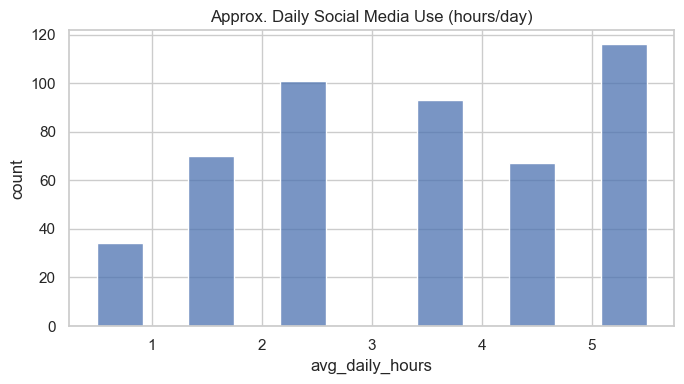

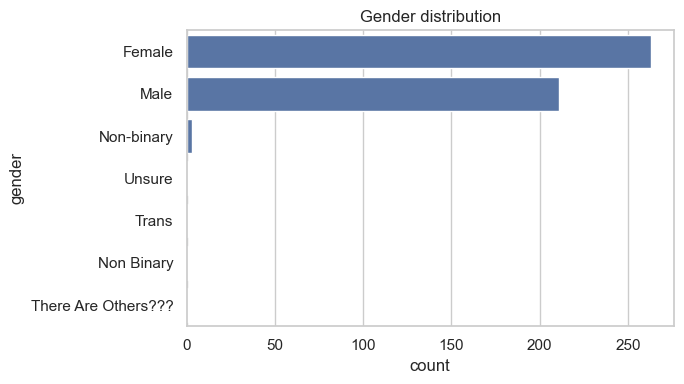

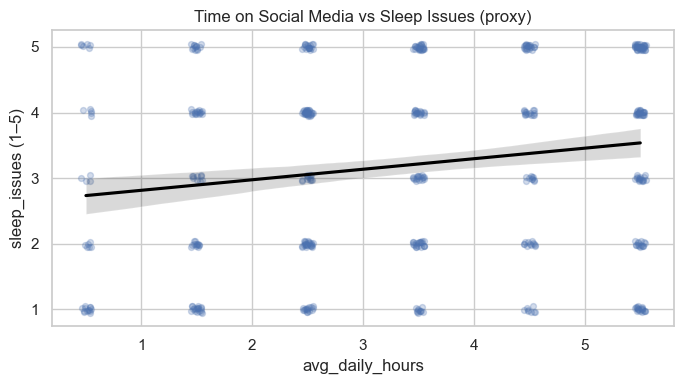

In [21]:
# --- Minimal EDA (sanity-check visuals) ---

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

# Distribution of time spent (numeric proxy)
plt.figure(figsize=(7, 4))
sns.histplot(df_processed['avg_daily_hours'].dropna().astype(float), bins=12)
plt.title('Approx. Daily Social Media Use (hours/day)')
plt.xlabel('avg_daily_hours')
plt.ylabel('count')
plt.tight_layout()
plt.show()

# Gender distribution
plt.figure(figsize=(7, 4))
order = df_processed['gender'].value_counts(dropna=False).index
sns.countplot(data=df_processed, y='gender', order=order)
plt.title('Gender distribution')
plt.xlabel('count')
plt.ylabel('gender')
plt.tight_layout()
plt.show()

# Relationship between time spent and sleep issues (Likert 1–5)
eda_tmp = df_processed.dropna(subset=['avg_daily_hours', 'sleep_issues']).copy()
eda_tmp['avg_daily_hours'] = eda_tmp['avg_daily_hours'].astype(float)
eda_tmp['sleep_issues'] = pd.to_numeric(eda_tmp['sleep_issues'], errors='coerce')

plt.figure(figsize=(7, 4))
sns.regplot(
    data=eda_tmp,
    x='avg_daily_hours',
    y='sleep_issues',
    x_jitter=0.05,
    y_jitter=0.05,
    scatter_kws={'alpha': 0.25, 's': 18},
    line_kws={'color': 'black'}
)
plt.title('Time on Social Media vs Sleep Issues (proxy)')
plt.xlabel('avg_daily_hours')
plt.ylabel('sleep_issues (1–5)')
plt.tight_layout()
plt.show()

## Ethics

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Team Expectations 

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback


## Project Timeline Proposal

Instructions: Replace this with your timeline.  **PLEASE UPDATE your Timeline!** No battle plan survives contact with the enemy, so make sure we understand how your plans have changed.  Also if you have lost points on the previous checkpoint fix them